In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [ ]:
df = pd.read_csv("workout_fitness_tracker_data.csv")


df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


In [ ]:

df.columns


Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [ ]:

df['BMI'] = df['Weight (kg)'] / ((df['Height (cm)'] / 100) ** 2)


df


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,...,Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout,BMI
0,1,39,Male,175,99,Cycling,79,384,112,8850,...,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued,32.326531
1,2,36,Other,157,112,Cardio,73,612,168,2821,...,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized,45.437949
2,3,25,Female,180,66,HIIT,27,540,133,18898,...,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued,20.370370
3,4,56,Male,154,89,Cycling,39,672,118,14102,...,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral,37.527408
4,5,53,Other,194,59,Strength,56,410,170,16518,...,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized,15.676480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,...,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral,19.713322
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,...,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued,24.280975
9997,9998,47,Male,183,75,Running,89,886,114,10532,...,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued,22.395413
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,...,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued,33.564014


In [ ]:

df['Gender'] = df['Gender'].replace('Other', 'Prefer to not say')


In [ ]:
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,...,Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout,BMI
0,1,39,Male,175,99,Cycling,79,384,112,8850,...,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued,32.326531
1,2,36,Prefer to not say,157,112,Cardio,73,612,168,2821,...,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized,45.437949
2,3,25,Female,180,66,HIIT,27,540,133,18898,...,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued,20.370370
3,4,56,Male,154,89,Cycling,39,672,118,14102,...,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral,37.527408
4,5,53,Prefer to not say,194,59,Strength,56,410,170,16518,...,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized,15.676480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Prefer to not say,173,59,Yoga,95,230,160,1330,...,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral,19.713322
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,...,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued,24.280975
9997,9998,47,Male,183,75,Running,89,886,114,10532,...,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued,22.395413
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,...,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued,33.564014


In [ ]:
df['Workout Type'].value_counts()

,count
Workout Type,
HIIT,1731
Strength,1667
Yoga,1666
Cycling,1656
Cardio,1645
Running,1635


In [ ]:


df.isnull().sum()



,0
User ID,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Workout Type,0
Workout Duration (mins),0
Calories Burned,0
Heart Rate (bpm),0
Steps Taken,0


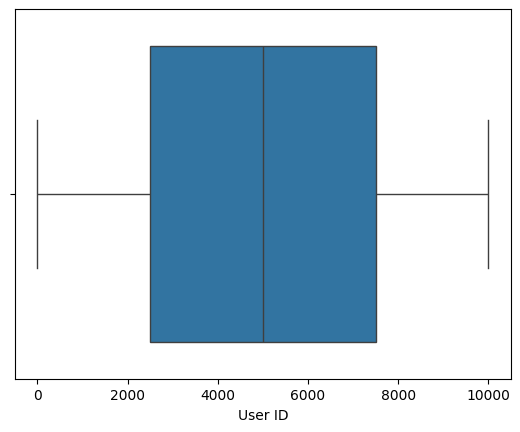

<Figure size 1000x500 with 0 Axes>

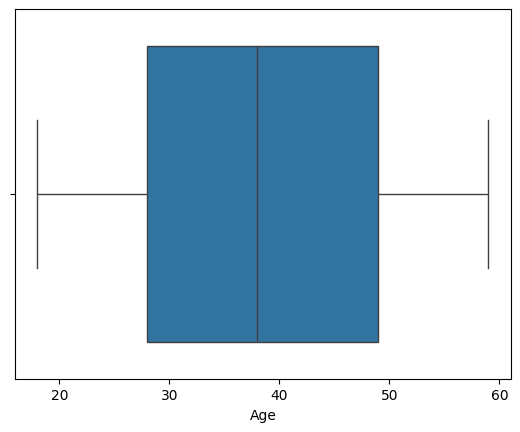

<Figure size 1000x500 with 0 Axes>

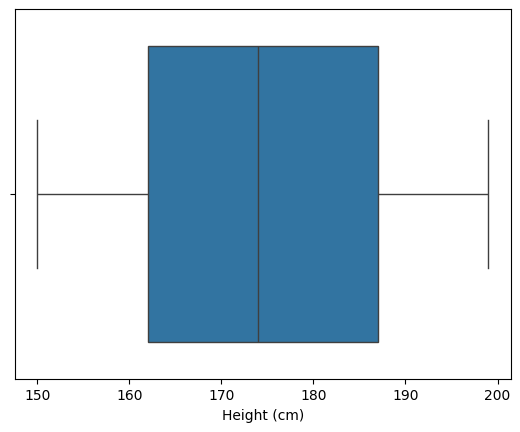

<Figure size 1000x500 with 0 Axes>

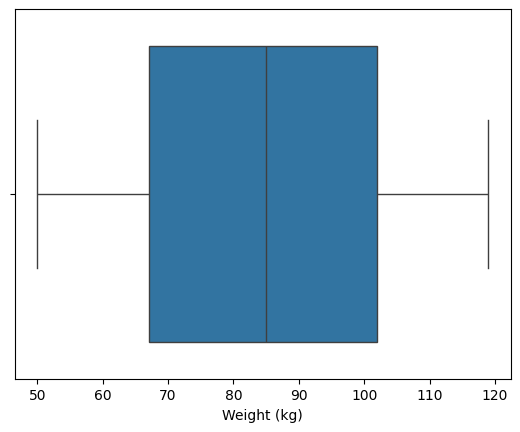

<Figure size 1000x500 with 0 Axes>

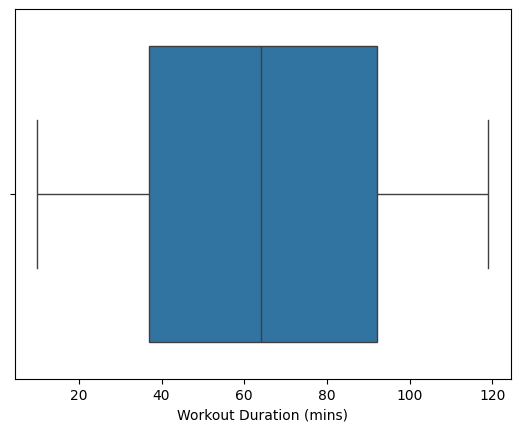

<Figure size 1000x500 with 0 Axes>

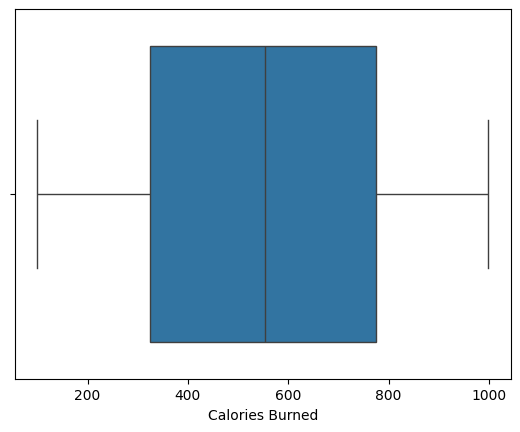

<Figure size 1000x500 with 0 Axes>

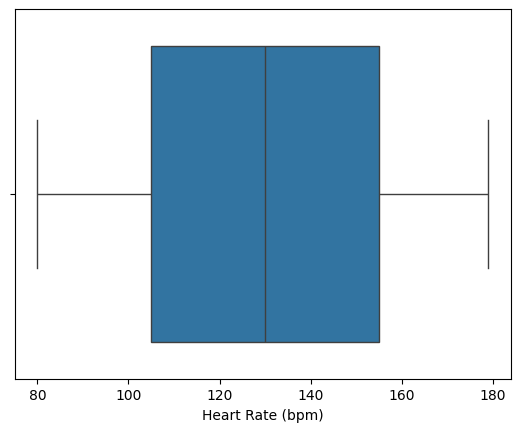

<Figure size 1000x500 with 0 Axes>

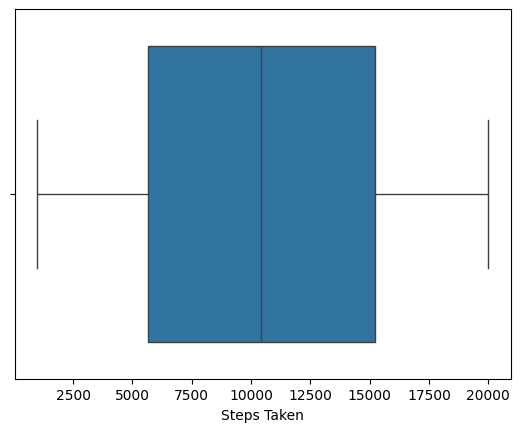

<Figure size 1000x500 with 0 Axes>

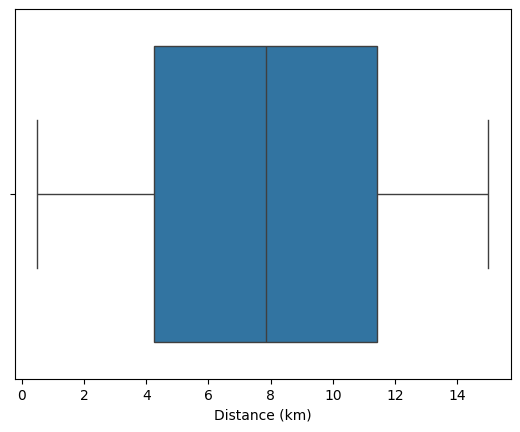

<Figure size 1000x500 with 0 Axes>

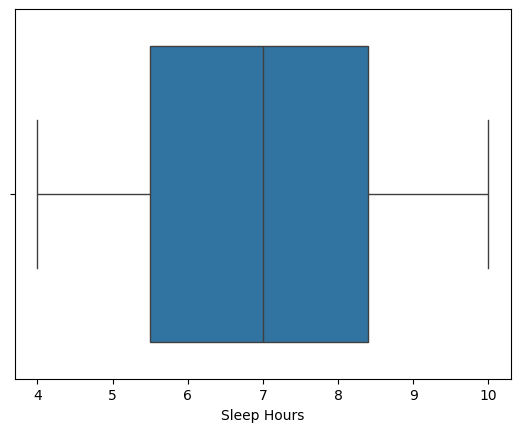

<Figure size 1000x500 with 0 Axes>

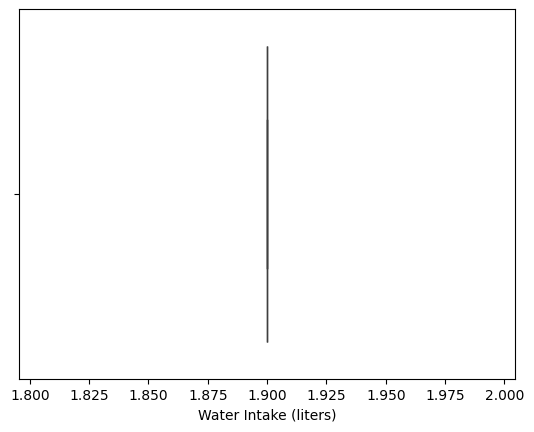

<Figure size 1000x500 with 0 Axes>

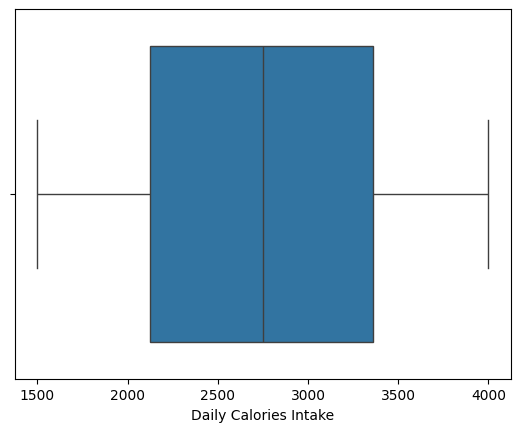

<Figure size 1000x500 with 0 Axes>

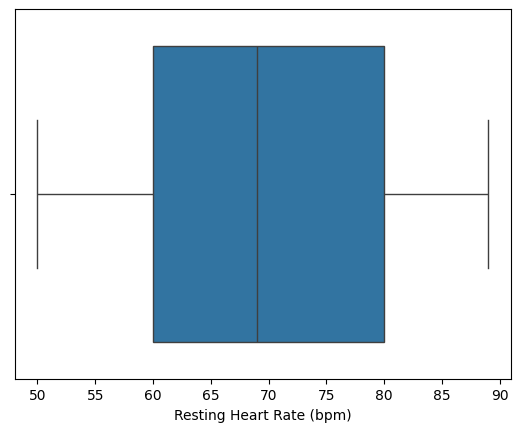

<Figure size 1000x500 with 0 Axes>

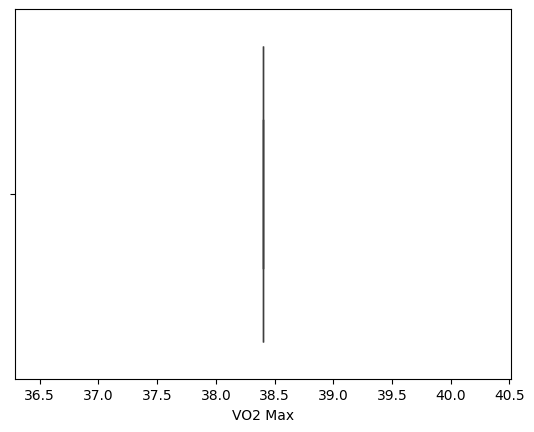

<Figure size 1000x500 with 0 Axes>

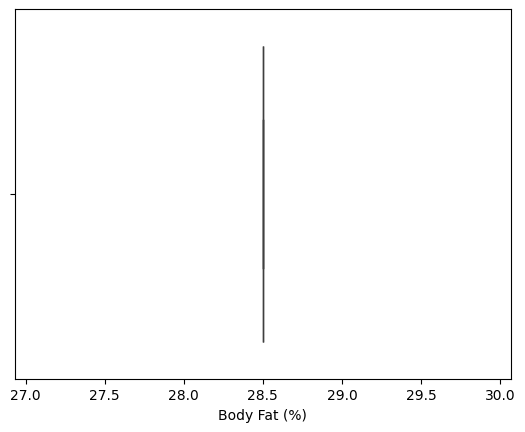

<Figure size 1000x500 with 0 Axes>

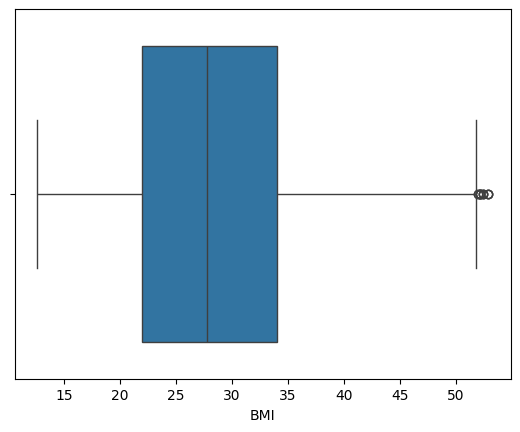

<Figure size 1000x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.figure(figsize=(10,5))
    plt.show()


here shown the BMI is high

In [ ]:
average_bmi_by_gender = df.groupby('Gender')['BMI'].mean()


average_bmi_by_gender


,BMI
Gender,
Female,28.350837
Male,28.772012
Prefer to not say,28.530169
